
## load data

In [1]:
import pandas as pd
dir_ = '/Users/shinbo/Downloads/yelp_review.csv'
data = pd.read_csv(dir_)

import numpy as np
# np.random.seed(1)
# index = np.random.choice(data.shape[0], 10000, replace=False)
# data.iloc[index,:].to_csv('/Users/shinbo/Desktop/metting/LDA/meeting materials/21.05.13/yelp_restaurant_sampled.csv',index=False)

In [2]:
data.shape

(5261668, 9)

In [3]:
dir_ = '/Users/shinbo/Desktop/metting/LDA/meeting materials/21.05.13/yelp_restaurant_sampled.csv'
rest = pd.read_csv(dir_)

In [4]:
rest.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,I6xTlLkMn2fQV0H46O25uQ,bm0GV0ylqyBitQlz8voIiw,LiSt3sVWELm7nfVIKJs0MA,2,2017-08-02,My office is close so we have been there a few...,0,0,0
1,1FJPW9lB3rvw_2fEgrxjyg,AhhfownYf49B7AaqONU7tg,6aDfalYZOkWzwtVRA2wYaA,4,2014-01-30,"Good food, great naan, fair prices. It is a ho...",0,0,0
2,BVMQPEUd-xqxCYEA44KVYQ,Txj_r1G7HGwvBlEIDeICqg,L2iT7pipc455Tgpbo35_mw,2,2017-05-22,CASA was once one of my favorite places in all...,2,1,0
3,D4-Bj105MorBwwT-6PpVKg,JUN6ulfdluN1XMDqZznoDg,rbH0HuTcBvZBbiAnqufRqQ,5,2014-08-25,Nothing comes close to this place! If you enjo...,1,0,0
4,I3s31Zz7INZ-GJAO20TOSg,v81uefRu-Nz8a4YiVaA8JQ,R68SX1-FFLvv6BqsK9-Alw,4,2014-12-04,Really enjoyed going here for dinner. I had f...,0,0,0


## setting seed words

In [6]:
import gensim

w2v_dir = '/Users/shinbo/Desktop/metting/LDA/paper/word_embedding/GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin'
word2vec_model = gensim.models.keyedvectors.KeyedVectors.load_word2vec_format(
    w2v_dir, binary=True
)

In [33]:
topics = ['food','drink','ambience','price','service']
seed_words = pd.DataFrame()
for topic in topics:
    a = word2vec_model.most_similar(topic, topn = 500)
    seed_words[topic] = [i[0] for i in a]
seed_words.to_csv('/Users/shinbo/Desktop/metting/LDA/meeting materials/21.05.13/seed_words.csv',index=False)

In [6]:
import sys
import pandas as pd
sys.path.append('/Users/shinbo/PycharmProjects/paper/LDA')

def print_top_words(lam, feature_names, n_top_words):
    for topic_id, topic in enumerate(lam):
        print('\nTopic Nr.%d:' % int(topic_id + 1))
        print(''.join([feature_names[i] + ' ' + str(round(topic[i], 2))
                       + ' | ' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
def TOP_N_WORDS_df(MODEL, TOP_N_WORDS, col_names):
    DMM_LDA_Top_words = pd.DataFrame()
    for i in range(5):
        temp = pd.DataFrame({'words':cv.get_feature_names(), 'lambda':MODEL.components_[i,:]})
        temp = temp.sort_values(by='lambda', ascending=False).iloc[:TOP_N_WORDS,:]
        DMM_LDA_Top_words[i] = temp['words'].tolist()
    DMM_LDA_Top_words.columns = col_names
    return DMM_LDA_Top_words

In [13]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer

dir_ = '/Users/shinbo/Desktop/metting/LDA/paper/experiments/yelp/prepare/proproc.pkl'
data = pickle.load(open(dir_, 'rb'))
stop_words = ['the','and','to','it','be','have','in','for','of','this','that',
              'go','get','place','time','come',
              'take','make','back','really','say','one','even','well','look',
              'back','also']
for i in range(len(data)):
    data[i] = [w for w in data[i] if w not in stop_words]

data_join = [' '.join(doc) for doc in data]
cv = CountVectorizer()
X = cv.fit_transform(data_join).toarray()

## DMM-LDA Result

In [37]:
dir_model = f'/Users/shinbo/Desktop/metting/LDA/paper/experiments/yelp/model/DMM_result.pkl'
DMM_LDA = pickle.load(open(dir_model,'rb'))
TOP_N_WORDS = 100
DMM_LDA_Top_words = TOP_N_WORDS_df(DMM_LDA, TOP_N_WORDS, [f'Topic {i}' for i in range(1,6)])

DMM_LDA_lam =  [DMM_LDA.components_[k,:] for k in range(5)]
print_top_words(DMM_LDA_lam, list(cv.get_feature_names()), 20)


Topic Nr.1:
good 1438.75 | food 1165.81 | service 1030.5 | order 935.25 | great 851.48 | like 733.23 | wait 675.33 | try 613.54 | first 443.83 | give 434.47 | hour 416.01 | ask 402.09 | drink 397.61 | know 395.17 | love 392.94 | table 392.38 | people 390.99 | price 383.85 | nice 383.33 | pizza 383.07 | 

Topic Nr.2:
like 698.99 | room 546.84 | good 525.29 | service 510.96 | great 457.89 | give 413.9 | need 390.56 | car 364.67 | food 356.75 | price 355.39 | want 330.39 | tell 320.35 | people 320.01 | much 319.61 | hotel 317.37 | wait 313.37 | know 310.37 | find 299.07 | check 296.26 | see 289.73 | 

Topic Nr.3:
good 1293.05 | great 1222.05 | food 1208.84 | like 818.22 | love 759.24 | order 738.58 | service 706.07 | try 699.31 | nice 598.12 | little 455.64 | menu 454.47 | staff 450.05 | friendly 431.86 | think 430.16 | give 422.85 | delicious 417.78 | always 407.15 | best 404.37 | definitely 391.04 | price 389.63 | 

Topic Nr.4:
food 1917.89 | good 1629.67 | like 1165.52 | great 1070.76

# TOP_N_WORDS = 100

In [38]:
DMM_LDA_Top_words = TOP_N_WORDS_df(DMM_LDA, TOP_N_WORDS, [f'Topic {i}' for i in range(1,6)])
DMM_LDA_Top_words.iloc[:20,:]

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,good,like,good,food,great
1,food,room,great,good,service
2,service,good,food,like,like
3,order,service,like,great,food
4,great,great,love,order,good
5,like,give,order,service,work
6,wait,need,service,restaurant,experience
7,try,car,try,try,never
8,first,food,nice,chicken,tell
9,give,price,little,love,need


In [39]:
DMM_LDA.perplexity

[24962.372882038024,
 15785.045206960667,
 15782.422420948513,
 15782.106116615261,
 15781.646970360089,
 15781.546045885398,
 15781.546036841712]

## DMM-CLDA Result

In [40]:
dir_model = f'/Users/shinbo/Desktop/metting/LDA/paper/experiments/yelp/model/CDMM_result.pkl'
DMM_CLDA = pickle.load(open(dir_model,'rb'))
DMM_CLDA_lam =  [DMM_CLDA.components_[k,:] for k in range(5)]
TOP_N_WORDS = 100
DMM_CLDA_Top_words = TOP_N_WORDS_df(DMM_CLDA, TOP_N_WORDS, ['price','food','drink','service','ambience'] )
DMM_CLDA_Top_words.iloc[:20,]

,price,food,drink,service,ambience
0,good,restaurant,drink,service,music
1,food,meal,bar,food,decor
2,price,buffet,beer,good,cozy
3,service,fajitas,good,friendly,ambience
4,great,michelin,great,staff,romantic
5,order,jajangmyun,food,like,dimly
6,like,like,bartender,customer,parisian
7,cheap,salsas,cocktail,waiter,decorative
8,reasonable,brushetta,refill,great,nostalgic
9,expensive,pubs,margarita,attentive,minimalist


In [41]:
DMM_CLDA.perplexity

[36755.37443603391,
 23081.00572437283,
 23076.095123339303,
 23075.557729473745,
 23075.243816938913,
 23075.24086624404,
 23075.064450137423,
 23074.979892985837,
 23074.979103521266,
 23074.979103353537]

## source result

In [42]:
dir_ = '/Users/shinbo/Desktop/metting/LDA/paper/experiments/yelp/prepare/source.pkl'
source = pickle.load(open(dir_,'rb'))
source.keys()

dict_keys(['ambience', 'drink', 'food', 'price', 'service'])

In [43]:
dir_model = f'/Users/shinbo/Desktop/metting/LDA/paper/experiments/yelp/model/DMM_source_result.pkl'
DMM_source = pickle.load(open(dir_model,'rb'))
DMM_source_lam =  [DMM_source.components_[k,:] for k in range(5)]
TOP_N_WORDS = 100
DMM_source_Top_words = TOP_N_WORDS_df(DMM_source, TOP_N_WORDS, ['ambience', 'drink', 'food', 'price', 'service'])
# DMM_source_Top_words.iloc[:20,].to_csv(
#     '/Users/shinbo/Desktop/metting/LDA/meeting materials/21.05.20/lambda_1.csv',
#     index=False
# )
result = DMM_source_Top_words.iloc[:20,][['price','food','drink','service','ambience']]
for i in range(20):
    row = list(result.iloc[i,:])
    print('& '.join(row) + ' \\')

food& food& like& great& good \
good& good& room& service& food \
like& like& drink& like& great \
great& great& good& food& service \
order& restaurant& wine& good& order \
service& rice& tea& work& like \
try& meat& service& staff& try \
restaurant& order& use& experience& wait \
price& sushi& great& tell& love \
love& love& need& never& give \
chicken& eat& give& customer& nice \
best& use& know& give& staff \
menu& store& much& recommend& friendly \
burger& try& beer& order& always \
fry& nice& price& need& first \
nice& roll& food& day& pizza \
want& service& new& ask& best \
taste& find& car& know& menu \
eat& fish& people& always& price \
always& many& year& call& drink \


In [44]:
DMM_source.perplexity

[87569.15233972018,
 27753.567370085304,
 27747.20172076535,
 27745.702794035245,
 27745.670403157645]

In [8]:
import pandas as pd
import numpy as np
from collections import Counter
def top_20_words_for_topics(CLDA_lam,CDMM, aux=None, n=50):
    if aux is True:
        K = len(CLDA_lam)-1
    else:
        K = len(CLDA_lam)
    words = {}
    unique_words = []
    for k in range(K):
        CLDA_lam_word = pd.DataFrame({'word':cv.get_feature_names(), 'lam':CDMM.components_[k,:] }).sort_values(by='lam', ascending=False)
        top_words = CLDA_lam_word.iloc[:n,:]['word'].tolist()
        words[k] = CLDA_lam_word.iloc[:n,:].set_index('word').to_dict()['lam']
        unique_words += top_words
        
    c = Counter(unique_words)
    words_all_appear = []
    for k,v in c.items():
        if v == K:
            words_all_appear.append(k)
    
    
    
    words_degree = []
    for k in range(K):
        for w,d in words[k].items():
            if w in words_all_appear:
                words_degree.append(d)
        
    return words_all_appear, len(set(unique_words)) / (K*n), len(set(unique_words)) , np.mean(words_degree)
words_, uq_words_ratio, uq_words_nums, asso_deg = top_20_words_for_topics(DMM_LDA_lam,DMM_LDA, n=50)
uq_words_ratio, uq_words_nums

(0.43, 86)

In [9]:
words_, uq_words_ratio, uq_words_nums, asso_deg = top_20_words_for_topics(DMM_CLDA_lam,DMM_CLDA, n=50)
uq_words_ratio, uq_words_nums

(0.535, 107)

In [10]:
words_, uq_words_ratio, uq_words_nums, asso_deg = top_20_words_for_topics(DMM_source_lam,DMM_source, n=50)
uq_words_ratio, uq_words_nums

(0.745, 149)

## n 변화시켜가며 비율 살펴보기

In [11]:
def varying_n(lam,mod):
    result = {}
    for n in range(10,51,10):
        words_, uq_words_ratio, uq_words_nums, asso_deg = top_20_words_for_topics(lam, mod, n=n)
        result[n] = (uq_words_ratio, uq_words_nums)
    return result

In [12]:
varying_n(DMM_LDA_lam,DMM_LDA)

{10: (0.575, 23),
 20: (0.4625, 37),
 30: (0.4166666666666667, 50),
 40: (0.4375, 70),
 50: (0.43, 86)}

In [13]:
varying_n(DMM_CLDA_lam,DMM_CLDA)

/Users/shinbo/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/shinbo/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{10: (0.9, 36),
 20: (0.85, 68),
 30: (0.65, 78),
 40: (0.575, 92),
 50: (0.535, 107)}

In [14]:
varying_n(DMM_source_lam,DMM_source)

{10: (0.825, 33),
 20: (0.7625, 61),
 30: (0.75, 90),
 40: (0.74375, 119),
 50: (0.745, 149)}

In [15]:
DMM_source.perplexity

[15683.33882455813, 4862.665228800802, 4862.573836663506, 4862.573774702469]

## Glove 벡터 이용

In [12]:
n=0
glove_dir = '/Users/shinbo/Desktop/metting/LDA/paper/word_embedding/glove.6B/glove.6B.100d.txt'
word2glove = {}
with open(glove_dir, encoding="utf8") as f:

    for line in f:
        word_vector = line.split() # 각 줄을 읽어와서 word_vector에 저장.
        word = word_vector[0] # word_vector에서 첫번째 값만 저장
        word2glove[word] = np.array([float(i) for i in word_vector[1:]])

In [47]:
from scipy.spatial.distance import cosine
TOP_N_WORDS = 10
DMM_LDA_Top_words = TOP_N_WORDS_df(DMM_LDA, TOP_N_WORDS, [f'Topic {i}' for i in range(1,6)])
DMM_CLDA_Top_words = TOP_N_WORDS_df(DMM_CLDA, TOP_N_WORDS, ['price','food','drink','service','ambience'] )
DMM_source_Top_words = TOP_N_WORDS_df(DMM_source, TOP_N_WORDS, ['price','food','drink','service','ambience'])     

In [48]:
from itertools import combinations
# 하나의 토픽 내에서 nC2
# 큰 값이 좋은 것임
def cosine_sim(df):
    total = 0
    for col in df.columns:
        cos_val = 0
        words = df[col].tolist()
        for c in combinations(words,2):
#             print(c)
            cos_val += 1-cosine(word2glove[c[0]], word2glove[c[1]])
#             print(c)
#             print(cosine(word2glove[c[0]], word2glove[c[1]]))
        print(col, cos_val)
        total += cos_val
    print(total/4)
cosine_sim(DMM_LDA_Top_words)
print()
cosine_sim(DMM_CLDA_Top_words)

NameError: name 'word2glove' is not defined

In [23]:
# 토픽별로 cross similarity
# 작은 값이 좋은 것임
def cosine_sim_cross_topic(df):
    cols = list(df.columns)
    total = 0
    for col in cols:
        cos_val = 0
        target_words = df[col].tolist()
        rest_cols = list(set(cols) - set([col]))
        for not_col in rest_cols:
#             print(col, not_col)
            cross_words = df[not_col].tolist()
            for target_word in target_words:
                for cross_word in cross_words:
#                     print(target_word, cross_word)
                    cos_val += 1-cosine(word2glove[target_word],
                               word2glove[cross_word])
        print(col, cos_val)
        total += cos_val
    print(total/4)
cosine_sim_cross_topic(DMM_LDA_Top_words)
print()
cosine_sim_cross_topic(DMM_CLDA_Top_words)

Topic 1 139.9889984932741
Topic 2 146.08137672283598
Topic 3 146.14787236591397
Topic 4 145.0820424201924
144.32507250055409

price 102.36063631059497
service 103.70896641408386
food 100.42500140438251
accomodation 107.43641007958207
103.48275355216084


### word2vec 이용

In [49]:
import gensim

w2v_dir = '/Users/shinbo/Desktop/metting/LDA/paper/word_embedding/GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin'
word2vec_model = gensim.models.keyedvectors.KeyedVectors.load_word2vec_format(
    w2v_dir, binary=True
)

In [52]:
# 하나의 토픽 내에서 nC2
# 큰 값이 좋은 것임
from collections import Counter
from itertools import combinations
from scipy.spatial.distance import cosine
N=20
def cosine_sim_w2v(df,N):
    df = df.iloc[:N,:]
    total = 0
    for col in df.columns:
        cos_val = 0
        words = df[col].tolist()
        for c in combinations(words,2):
#             print(c)
            try:
                cos_val += 1-cosine(word2vec_model.get_vector(c[0]),
                               word2vec_model.get_vector(c[1]))
            except:
                pass
#             print(c)
#             print(cosine(word2glove[c[0]], word2glove[c[1]]))
#         print(col, cos_val)
        total += cos_val
    return total
result = cosine_sim_w2v(DMM_LDA_Top_words,N)
print(f'Mean: {result/5}')
print()
result = cosine_sim_w2v(DMM_CLDA_Top_words,N)
print(f'Mean: {result/5}')
print()
result = cosine_sim_w2v(DMM_source_Top_words,N)
print(f'Mean: {result/5}')

Mean: 8.581041695550084

Mean: 9.156357607850804

Mean: 8.246128985472023


In [35]:
# 토픽별로 cross similarity
# 작은 값이 좋은 것임
def cosine_sim_w2v_cross_topic(df):
    cols = list(df.columns)
    total = 0
    for col in cols:
        cos_val = 0
        target_words = df[col].tolist()
        rest_cols = list(set(cols) - set([col]))
        for not_col in rest_cols:
#             print(col, not_col)
            cross_words = df[not_col].tolist()
            for target_word in target_words:
                for cross_word in cross_words:
#                     print(target_word, cross_word)
                    cos_val += 1-cosine(word2vec_model.get_vector(target_word),
                               word2vec_model.get_vector(cross_word))
        print(col, cos_val)
        total += cos_val
    print(total)
cosine_sim_w2v_cross_topic(DMM_LDA_Top_words)
print()
cosine_sim_w2v_cross_topic(DMM_CLDA_Top_words)
print()
cosine_sim_w2v_cross_topic(DMM_source_Top_words)

Topic 1 57.16011403314769
Topic 2 58.74213494709693
Topic 3 52.35971114039421
Topic 4 55.431902976939455
223.6938630975783

price 31.277103207539767
service 39.33417551475577
food 35.5444508001674
accomodation 39.11769031314179
145.27341983560473

price 33.499387064250186
service 33.94938659033505
food 29.342106708092615
accomodation 37.30153795069782
134.09241831337567


## n=10,20,50,100

In [69]:
from scipy.spatial.distance import cosine
from scipy.spatial.distance import cosine
TOP_N_WORDS = 100
DMM_LDA_Top_words = TOP_N_WORDS_df(DMM_LDA, TOP_N_WORDS, [f'Topic {i}' for i in range(1,6)])
DMM_CLDA_Top_words = TOP_N_WORDS_df(DMM_CLDA, TOP_N_WORDS, ['price','food','drink','service','ambience'] )
DMM_source_Top_words = TOP_N_WORDS_df(DMM_source, TOP_N_WORDS, ['price','food','drink','service','ambience'])         

In [70]:
def topic_cross(df,N):
    df = df.iloc[:N,:]
    cols = list(df.columns)
    total = 0
    result = {}
    for col in cols:
        result[col] = {}
        rest_cols = list(set(cols) - set([col]))
        for word in df[col].tolist():
            # cosine sim within topic
            cos_val_intrinsic = 0
            for intra_word in list( set(df[col].tolist()) - set([word]) ):
                try:
                    cos_val_intrinsic += 1-cosine(word2vec_model.get_vector(word),
                           word2vec_model.get_vector(intra_word))
                except KeyError:
                    pass
            # cosin sim between topic
            max_cos_val_between = 1e-10
            for cross_col in rest_cols:
                cos_val_between = 0
                for cross_word in df[cross_col].tolist():
                    try:
                        cos_val_between += 1-cosine(word2vec_model.get_vector(word),
                               word2vec_model.get_vector(cross_word))
                    except KeyError:
                        pass
                if max_cos_val_between < cos_val_between:
                    max_cos_val_between = cos_val_between
            # compare within topic vs between topic
            if cos_val_intrinsic < max_cos_val_between:
                result[col][word] = 0
            else:
                result[col][word] = 1
    val = 0
#     print(result)
    for topic in result.keys():
        for word in result[topic].keys():
            val += result[topic][word]
#     print(val)
    return val

        
# topic_cross(DMM_LDA_Top_words,N=10)
# print()
# topic_cross(DMM_CLDA_Top_words,N=10)
# print()
# topic_cross(DMM_source_Top_words,N=10)

In [87]:
result_LDA = pd.DataFrame()
for n in range(10,101,10):
    a = cosine_sim_w2v(DMM_LDA_Top_words,n)
    b = topic_cross(DMM_LDA_Top_words,n)
    print(a,b)
    row = [n,'DMM_LDA',a,b]
    result_LDA = pd.concat([result_LDA, pd.DataFrame(row).T])

result_CLDA = pd.DataFrame()
for n in range(10,101,10):
    a = cosine_sim_w2v(DMM_CLDA_Top_words,n)
    b = topic_cross(DMM_CLDA_Top_words,n)
    row = [n,'DMM_CLDA',a,b]
    result_CLDA = pd.concat([result_CLDA, pd.DataFrame(row).T])

result_source = pd.DataFrame()
for n in range(10,101,10):
    a = cosine_sim_w2v(DMM_source_Top_words,n)
    b = topic_cross(DMM_source_Top_words,n)
    row = [n,'DMM_source',a,b]
    result_source = pd.concat([result_source, pd.DataFrame(row).T])
    
result = pd.concat([result_LDA,result_CLDA,result_source])
result.columns = ['n','model','intrinsic','cross']

result['intrinsic'] = result['intrinsic'].astype(float)
result['cross'] = result['cross'].astype(float)

In [88]:
df_diff_1 = pd.DataFrame({'n':[i for i in range(10,101,10)]})
df_diff_1['intrinsic'] = list(result_CLDA.iloc[:,2] - result_LDA.iloc[:,2])
df_diff_1['model'] = 'CLDA-LDA'

df_diff_2 = pd.DataFrame({'n':[i for i in range(10,101,10)]})
df_diff_2['intrinsic'] = list(result_CLDA.iloc[:,2] - result_source.iloc[:,2])
df_diff_2['model'] = 'CLDA-source'

df_diff = pd.concat([df_diff_1,df_diff_2])

<function matplotlib.pyplot.show(*args, **kw)>

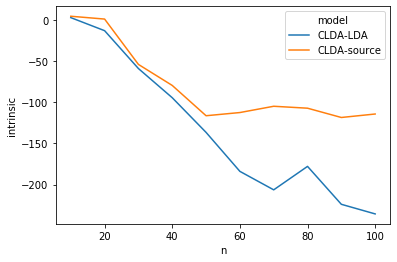

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x='n',y='intrinsic',hue='model',data=df_diff)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

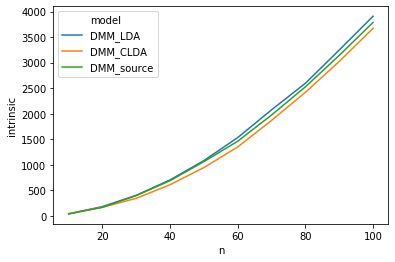

In [90]:
sns.lineplot(x='n',y='intrinsic',hue='model',data=result)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

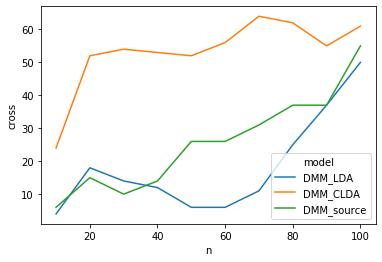

In [94]:
sns.lineplot(x='n',y='cross',hue='model',data=result)
plt.savefig('/Users/shinbo/Desktop/metting/LDA/paper/experiments/yelp/fig/BC.png')
plt.show

In [95]:
tick = pd.DataFrame()
tick['DMM_LDA'] = result[lambda x: x['model'] == 'DMM_LDA']['cross'].tolist()
tick['DMM_source'] = result[lambda x: x['model'] == 'DMM_source']['cross'].tolist()
tick['DMM_CLDA'] = result[lambda x: x['model'] == 'DMM_CLDA']['cross'].tolist()
tick['n'] = range(10,101,10)
tick

,DMM_LDA,DMM_source,DMM_CLDA,n
0,4.0,6.0,24.0,10
1,18.0,15.0,52.0,20
2,14.0,10.0,54.0,30
3,12.0,14.0,53.0,40
4,6.0,26.0,52.0,50
5,6.0,26.0,56.0,60
6,11.0,31.0,64.0,70
7,25.0,37.0,62.0,80
8,37.0,37.0,55.0,90
9,50.0,55.0,61.0,100


In [87]:
data.shape

(3370, 3)

In [46]:
TOP_N_WORDS = 100
DMM_LDA_Top_words = TOP_N_WORDS_df(DMM_LDA, TOP_N_WORDS, [f'Topic {i}' for i in range(1,6)])
DMM_CLDA_Top_words = TOP_N_WORDS_df(DMM_CLDA, TOP_N_WORDS, ['food','drink','ambience','price','service'] )
DMM_source_Top_words = TOP_N_WORDS_df(DMM_source, TOP_N_WORDS, ['food','drink','ambience','price','service'])     

In [47]:
from collections import Counter
words = []
for review in data:
    words += review
words_counter = Counter(words)

<function matplotlib.pyplot.show(*args, **kw)>

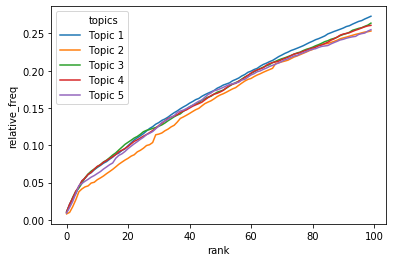

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
result = pd.DataFrame()
for column in DMM_LDA_Top_words.columns:
    temp = pd.DataFrame()
    words_ = DMM_LDA_Top_words[column].tolist()
    freq = []
    for word in words_:
        freq.append( words_counter[word] / len(words) )
    temp['relative_freq'] = np.cumsum(freq)
    temp['rank'] = [i for i in range(100)]
    temp['topics'] = column
    
    result = pd.concat([result,temp], axis=0)
    
sns.lineplot(x='rank',y='relative_freq',hue='topics',data=result)
plt.show

No handles with labels found to put in legend.


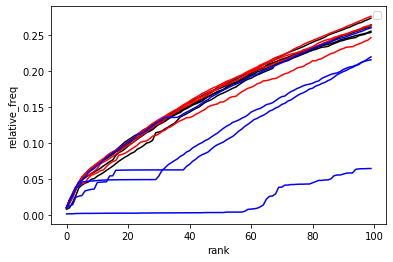

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
# result = pd.DataFrame()
for column in DMM_source_Top_words.columns:
    temp = pd.DataFrame()
    words_ = DMM_source_Top_words[column].tolist()
    freq = []
    for word in words_:
        freq.append( words_counter[word] / len(words) )
    temp['relative_freq'] = np.cumsum(freq)
    temp['rank'] = [i for i in range(100)]
    temp['topics'] = column
    
    result = pd.concat([result,temp], axis=0)
    
# sns.lineplot(x='rank',y='relative_freq',hue='topics',data=result)
# plt.show

import matplotlib.pyplot as plt
import seaborn as sns
# result = pd.DataFrame()
for column in DMM_CLDA_Top_words.columns:
    temp = pd.DataFrame()
    words_ = DMM_CLDA_Top_words[column].tolist()
    freq = []
    for word in words_:
        freq.append( words_counter[word] / len(words) )
    temp['relative_freq'] = np.cumsum(freq)
    temp['rank'] = [i for i in range(100)]
    temp['topics'] = column
    
    result = pd.concat([result,temp], axis=0)
    
# sns.lineplot(x='rank',y='relative_freq',hue='topics',data=result)
# plt.show
result['model'] = ['LDA']*500 + ['SLDA']*500 + ['CLDA']*500

model2topics = {
    'LDA':['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5'],
    'SLDA':['price','service','food','ambience','accomodation'],
    'CLDA':['price','service','food','ambience','accomodation'],
}
colors = {
    'LDA':'black',
    'SLDA':'red',
    'CLDA':'blue',
}

for model in model2topics.keys():
    color = colors[model]
    for topic in model2topics[model]:
        temp = result[lambda x: (x['model'] == model) & (x['topics'] == topic)]
        sns.lineplot(x='rank',y='relative_freq',data=temp, color=color)
plt.legend()

In [50]:
result[lambda x: (x['model'] == 'CLDA') & (x['relative_freq'] <= 0.1) & (x['rank'] == 99)]

,relative_freq,rank,topics,model
99,0.031400,99,drink,CLDA
99,0.064536,99,ambience,CLDA


In [52]:
DMM_CLDA_Top_words[['drink','ambience']].head(20)

,drink,ambience
0,beer,flavor
1,bev,dining
2,sangria,greenery
3,pints,ambiance
4,cocktails,crunchiness
5,brew,texture
6,martini,milieu
7,alcohol,acoustics
8,drank,ambient
9,brewsky,freshness
